### Rangeline Analysis

In [1]:
%matplotlib notebook
import scipy
import scipy.signal as sg
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spio.loadmat('rangeline.mat')

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Sep 17 14:31:47 2020',
 '__version__': '1.0',
 '__globals__': [],
 'Final_signal': array([[-1.40758605e-04+5.75508470e-05j, -1.88279519e-04+5.86778136e-05j,
         -1.28239188e-04+7.67882399e-05j, ...,
          3.91463011e-05+7.19838930e-05j,  3.32815435e-05+1.09791209e-04j,
         -2.11632750e-05+7.82077554e-05j]])}

In [3]:
rl = np.array(spio.loadmat('rangeline.mat')["Final_signal"])[0]
fs = 6.25e6

<IPython.core.display.Javascript object>


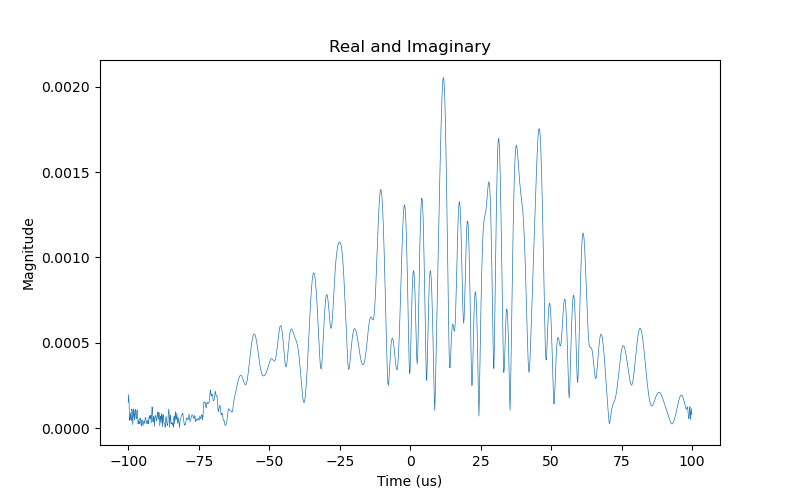

In [22]:
fig1 = plt.figure(figsize=(8,5))
t = np.arange(-len(rl)/(2*fs), len(rl)/(2*fs), 1/(fs))
plt.plot(t*1e6, np.abs(rl), linewidth=0.5)
#plt.plot(t*1e6, np.imag(rl), linewidth=0.5)
plt.title("Real and Imaginary")
plt.xlabel("Time (us)")
plt.ylabel("Magnitude")
plt.show()

<IPython.core.display.Javascript object>


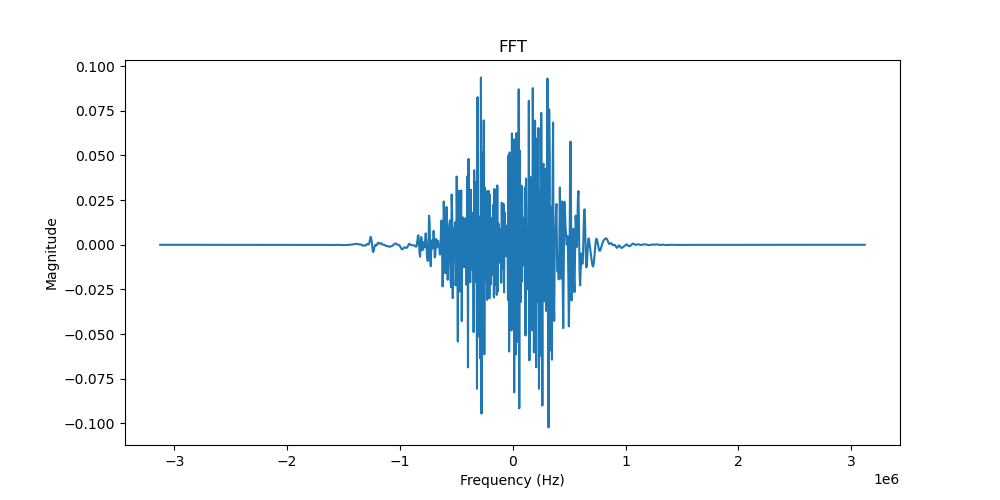

In [5]:
fig2 = plt.figure(figsize=(10,5))
freqs = np.arange(-fs/2, fs/2, fs/len(rl))
plt.plot(freqs, np.real(scipy.fft.fftshift(scipy.fft.fft(rl))))
#plt.plot(np.imag(scipy.fft.fftshift(scipy.fft.fft(rl))))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("FFT")
plt.show()

In [6]:
path = "C:/Users/hansg/Desktop/HS2/DDS_Config/data/"
ptsperfile = 1200

#assumes arr is a 2d numpy array 
def write2file(arr):
    numfiles = int(np.ceil(arr.shape[1]/ptsperfile))
    f = open(path+"data1.txt", "w+")
    for chunk in range(numfiles):
        f = open(path + "data" + str(chunk) +".txt", "w+")
        for i in range(min(ptsperfile, arr.shape[1] - chunk * ptsperfile)):       #write the address
            address = chunk * ptsperfile + i
            flipped_addr = address #reverse_bit(address)  ##don't reverse it
            f.write("0" + format(((flipped_addr>>15) & 3), 'x') + ",")
            f.write(format(((flipped_addr>>7) & 0xFF), 'x') + ",")
            f.write(format((flipped_addr << 1) & 0xFF, 'x') + ",")
            f.write(format((arr[0,address] >> 8) & 0xFF, 'x')+ "," )
            f.write(format((arr[0,address]) & 0xFF, 'x')+ "," )
            f.write(format((arr[1,address] >> 8) & 0xFF, 'x')+ "," )
            f.write(format((arr[1,address]) & 0xFF, 'x')+ ",\n" )
        f.close()
    print(str(numfiles) + " files successfully written")

def reverse_bit(num):
    result = 0
    for _ in range(17):
        result = (result << 1) + (num & 1)
        num >>= 1
    return result

arr1d = np.array([int(0x7FFF*(np.sin(i*2*np.pi/100.0)+1)) for i in range(24000)])
arr2d = np.array([int(0x7FFF*(np.cos(i*2*np.pi/100.0)+1)) for i in range(24000)])
arr = np.stack((arr1d, arr2d), axis=0)
write2file(arr)


20 files successfully written


<IPython.core.display.Javascript object>


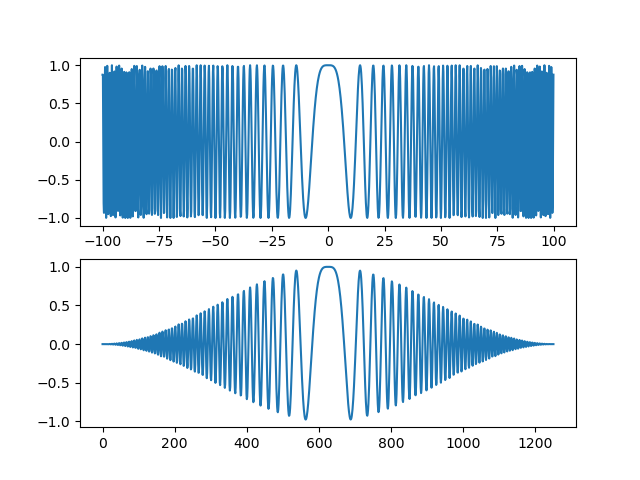

In [23]:
#generate a complex chirp
fig3, ax = plt.subplots(2, 1)
chirp = np.exp(-1j * np.pi * 2e6/(200e-6) * t**2)
ax[0].plot(t*1e6, np.real(chirp))
plt.show()

In [24]:
#hann window
window = np.hanning(len(rl))
wd = chirp * window
ax[1].plot(np.real(wd))

<IPython.core.display.Javascript object>


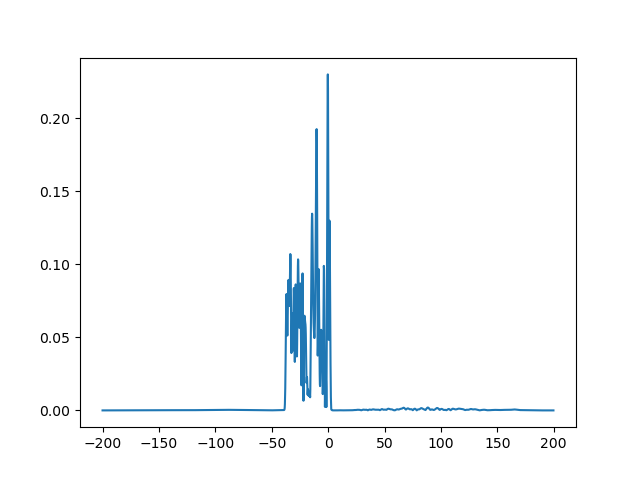

In [20]:
#autocorrellation
output = np.convolve((wd), np.flip(rl), mode='full')
nt = np.arange(-len(rl)/(fs), len(rl)/(fs)-1/(fs), 1/(fs))
fig4 = plt.figure()
plt.plot(nt*1e6, np.abs(output))
#plt.plot(wd)